<a href="https://colab.research.google.com/github/jcanjosRO/DataScience/blob/main/airbnb_lisboaJean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Data Science na Prática 3.0**
*by [Jean Carlos]*

---

# Análise dos Dados do Airbnb - *Lisboa*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

##Obtenção dos Dados##

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, iremos uitilizar os dados relativos à cidade de Lisboa em Portugal que foi obtido por meio do seguinte [arquivo](http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-07-10/visualisations/listings.csv):

listings.csv - Summary information and metrics for listings in Lisbon (good for visualisations).

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o conjunto de dados exato utilizado nesse notebook não esteja mais disponível.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/listings_lisboa.csv")

Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

Dicionário das variáveis:



* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas 

df.head()




,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,27,2021-01-26,0.32,1,83
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,3,114,2019-11-08,1.30,1,305
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,50,3,328,2019-10-29,2.77,1,143
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,53,2,274,2020-11-26,2.74,1,303
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,1114,2,55,2020-03-11,0.84,1,349


In [4]:
# mostrar as 5 ultimas 

df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19453,50936315,Remédios River View - Studio,248190255,Lisbon Best Choice,Lisboa,Santa Maria Maior,38.712205,-9.128637,Private room,68,1,0,NaN,NaN,11,308
19454,50936510,Remédios Standard - Two Bedroom,248190255,Lisbon Best Choice,Lisboa,Santa Maria Maior,38.710649,-9.128901,Entire home/apt,68,1,0,NaN,NaN,11,339
19455,50936634,Remédios Dorm - Two Bedrooms,248190255,Lisbon Best Choice,Lisboa,Santa Maria Maior,38.711136,-9.128554,Entire home/apt,84,1,0,NaN,NaN,11,326
19456,50938402,"apartment in center, ocean-view terrace & barb...",2774672,Herwig,Mafra,Ericeira,38.969180,-9.417510,Entire home/apt,124,5,0,NaN,NaN,8,364
19457,50939214,Terrace Saldanha Apartment,140552386,Nana,Lisboa,Arroios,38.734432,-9.139777,Entire home/apt,55,3,0,NaN,NaN,3,341


In [5]:
df['neighbourhood_group'].unique()

array(['Lisboa', 'Cascais', 'Sintra', 'Alenquer', 'Vila Franca De Xira',
       'Mafra', 'Torres Vedras', 'Lourinh', 'Oeiras', 'Cadaval',
       'Amadora', 'Arruda Dos Vinhos', 'Loures', 'Odivelas', 'Azambuja',
       'Sobral De Monte Agrao'], dtype=object)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**


In [11]:
# identificar o volume de dados do DataFrame
#Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

#df.shape
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis(colunas):\t {}\n".format(df.shape[1]))


# verificando os tipos das variáveis

df.dtypes




Entradas:	 19458
Variáveis(colunas):	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
# de forma alternativa

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19458 entries, 0 to 19457
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19458 non-null  int64  
 1   name                            19448 non-null  object 
 2   host_id                         19458 non-null  int64  
 3   host_name                       19437 non-null  object 
 4   neighbourhood_group             19458 non-null  object 
 5   neighbourhood                   19458 non-null  object 
 6   latitude                        19458 non-null  float64
 7   longitude                       19458 non-null  float64
 8   room_type                       19458 non-null  object 
 9   price                           19458 non-null  int64  
 10  minimum_nights                  19458 non-null  int64  
 11  number_of_reviews               19458 non-null  int64  
 12  last_review                     

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


*   As variáveis reviews_per_month e last_review possuem valores nulos em quase 20% das linhas.
*   As variáveis name e host_name têm aproximadamente 0,1% dos valores nulos.

In [14]:
# encontrando valores ausentes
df.isnull().sum()

id                                   0
name                                10
host_id                              0
host_name                           21
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3573
reviews_per_month                 3573
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [15]:
# verificando em termos percentuais e ordenando em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


reviews_per_month                 0.183626
last_review                       0.183626
host_name                         0.001079
name                              0.000514
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Com base no resultado anterior, faremos as seguintes considerações:

* 'nome' A menos que você queira fazer uma análise baseada em texto dos nomes dos aluguéis, esta coluna não acrescentará muito à sua análise.
Decisão: Apagar.

* 'host_name' Aqui, novamente, esta coluna contém informações pessoais e não acrescenta muito à nossa análise. Mesmo se por algum motivo precisássemos usá-lo, seu uso seria limitado, pois na maioria dos casos apenas o primeiro nome é fornecido.
Decisão: Apagar.

* 'last_review' um valor ausente provavelmente significa que não houve nenhum comentário para esta locação. Não iremos usar isso para nenhuma análise ou visualização.
Decisão: Apagar

* 'reviews_per_month' Podemos fazer algumas análises com isso. Este é o tipo de situação em que a própria intuição complementa a análise. Nesta coluna, os valores ausentes provavelmente não significam que os pontos de dados não foram registrados, mas que eles não existem, um contraste que aprendi a apreciar ao lidar com valores ausentes.
Decisão: SUBSTITUIR os valores ausentes com 0's



In [16]:
# apagando as colunas:
df.drop(['name','host_name','last_review'],axis = 1,inplace=True)

# Agora nos temos 13 variáveis 
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,14455,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,27,0.32,1,83
1,25659,107347,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,3,114,1.30,1,305
2,29248,125768,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,50,3,328,2.77,1,143
3,29396,126415,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,53,2,274,2.74,1,303
4,29720,128075,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,1114,2,55,0.84,1,349


In [17]:
# iremos substituir os valores ausentes de "reviews_per_month" por zeros
df['reviews_per_month'].fillna(0,inplace=True)

In [19]:
# checando os dados
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, iremos plotar o histograma.

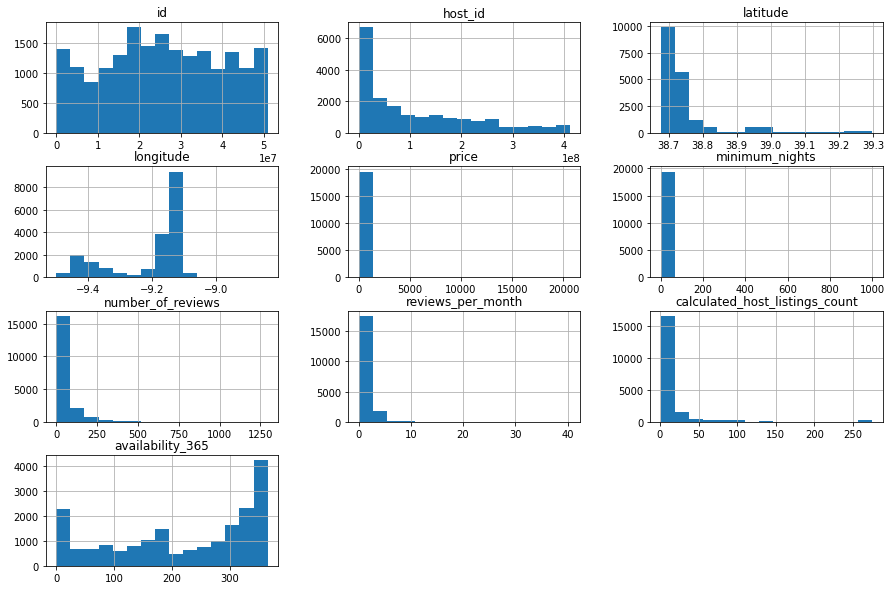

In [20]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

In [21]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000
mean,108.296022,3.850396,42.815860,0.962918,14.212560,218.978878
std,281.433465,16.737444,69.092684,1.264042,36.725234,125.645147
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.080000,1.000000,113.000000
50%,72.000000,2.000000,12.000000,0.490000,4.000000,251.000000
75%,110.000000,3.000000,55.000000,1.440000,11.000000,335.000000
max,20628.000000,1000.000000,1294.000000,40.450000,275.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável price possui 75% do valor abaixo de 110, porém seu valor máximo é 20628.
* A quantidade máxima de noites (minimum_nights) está acima de 365 dias no ano.

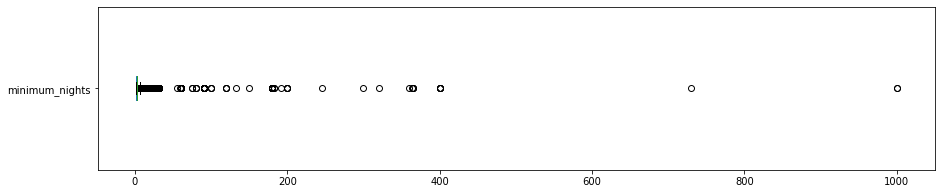

minimum_nights: valores acima de 30:
95 entradas
0.4882%


In [22]:
# boxplot para minimum_nights

# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

**Boxplot para Price**

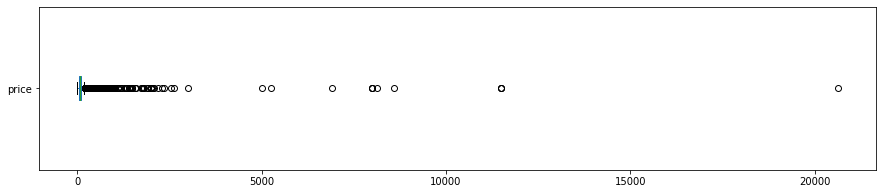


price: valores acima de 1500
34 entradas
0.1747%


In [23]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

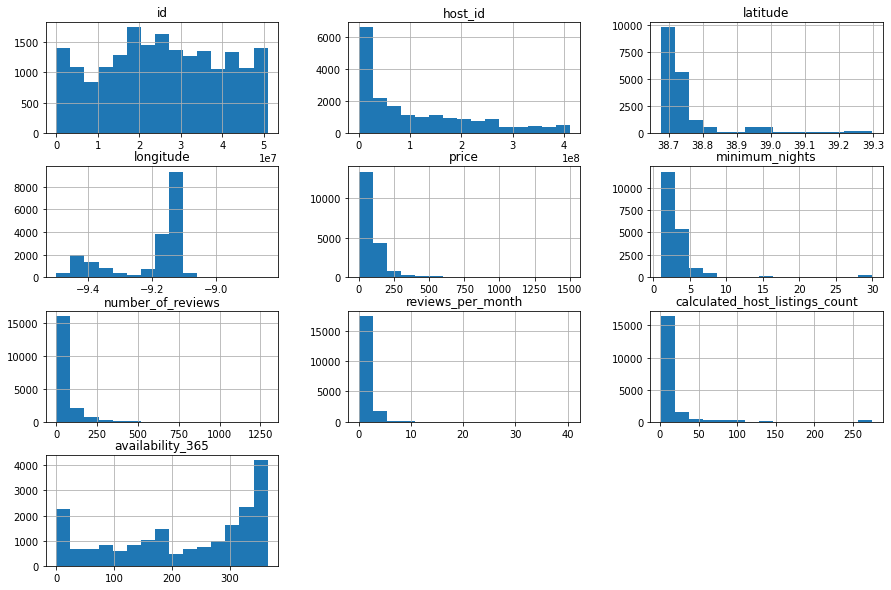

In [24]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
#df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, iremos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [25]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.019791,-0.121563,-0.136587,0.005365,0.051068
minimum_nights,-0.019791,1.000000,-0.066848,-0.097634,-0.045867,-0.068146
number_of_reviews,-0.121563,-0.066848,1.000000,0.765722,-0.085714,-0.008787
reviews_per_month,-0.136587,-0.097634,0.765722,1.000000,-0.050198,-0.004571
calculated_host_listings_count,0.005365,-0.045867,-0.085714,-0.050198,1.000000,0.046116
availability_365,0.051068,-0.068146,-0.008787,-0.004571,0.046116,1.000000


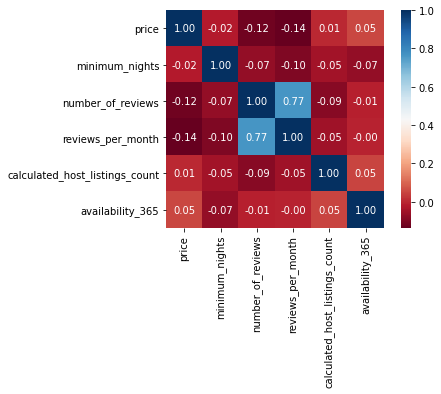

In [26]:
# plotando heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [27]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14387
Private room        4231
Hotel room           364
Shared room          347
Name: room_type, dtype: int64

In [28]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.744322
Private room       0.218894
Hotel room         0.018832
Shared room        0.017952
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara em Lisboa?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [29]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Alguber                                            480.00
Ota                                                465.00
Freiria                                            320.00
Cardosas                                           298.00
Vermelha                                           276.50
Aveiras de Baixo                                   274.50
Bucelas                                            243.70
Vale do Paraso                                     230.00
Azambuja                                           228.00
Enxara do Bispo, Gradil e Vila Franca do Rosrio    206.75
Name: price, dtype: float64

Acima, vemos que bairros como Alguber e Ota estão com média de preço superior.

Iremos verificar a quantidade de imoves nesses 2 bairros.

In [32]:
# ver quantidade de imóveis em Alguber e Ota
print(df_clean[df_clean.neighbourhood == "Alguber"].shape)

print(df_clean[df_clean.neighbourhood == "Ota"].shape)

# ver a entrada para Alguber
df_clean[df_clean.neighbourhood == "Alguber"]

(1, 13)
(1, 13)


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
19304,50695709,409658585,Cadaval,Alguber,39.27375,-9.0207,Entire home/apt,480,1,0,0.0,1,362


Notamos que uma amostra pode ser não-representativa, veja quantas entradas há para o Alguber e Ota

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

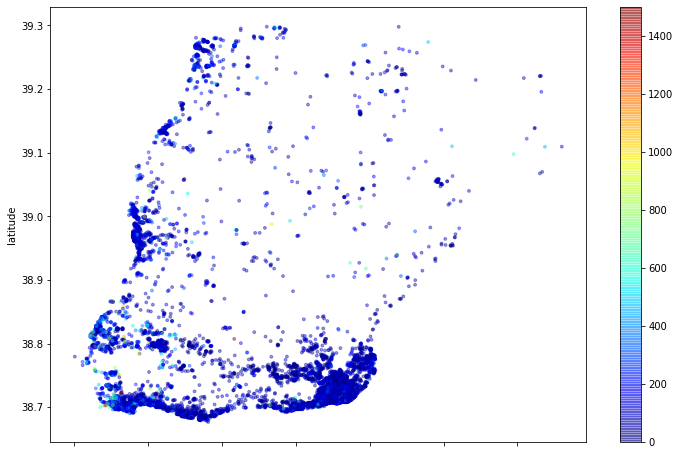

In [31]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

# Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.